# **종합실습2 이변량분석(y-범주) : 직원 이직 분석**

![](https://www.talentalign.com/wp-content/uploads/2019/09/main-qimg-2434943004743f79c0abf540cb4f6e2c-cropped.jpg)

* 직원 이직 분석
    * 회사에서 최근 1~2년 사이 이직률이 상승하였습니다.
    * 여러분은, 직원들이 이직하는데 중요한 요인이 무엇인지 데이터를 기반으로 한 분석을 의뢰 받았습니다.

## **1. 환경준비**

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      # mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.

In [2]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple3.csv'
data = pd.read_csv(path)
data.head(5)

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,27,2,1898,Female,3,Single,6500,No,14,9
1,0,27,9,1965,Male,4,Single,4105,No,14,7
2,0,44,2,1703,Female,4,Married,7879,Yes,19,9
3,0,42,2,1231,Male,1,Married,6272,No,16,10
4,0,32,1,2016,Female,4,Married,10422,No,19,14


> * 변수설명
    * **Attrition**	:	이직여부, Yes , No (**Target**)
    * **Age**	:	나이
    * **DistanceFromHome**	:	집-직장 거리(마일)
    * **EmployeeNumber**	:	사번
    * **Gender**	:	성별(Male, Female)
    * **JobSatisfaction**	:	직무 만족도, 다음시트 참조
    * **MaritalStatus**	:	결혼상태(Married, Single, Divorced)
    * **MonthlyIncome**	:	월급(달러)
    * **OverTime**	:	야근여부
    * **PercentSalaryHike**	:	전년대비 급여인상율(%)
    * **TotalWorkingYears**	:	총 근무 연수



## **2. 단변량 분석**

### 1. 먼저 target에 대해 단변량 분석해야 함

In [3]:
# 범주형 데이터이므로 빈도수 계산
target = 'Attrition'
data[target].value_counts()

Attrition
0    405
1    195
Name: count, dtype: int64

In [4]:
data[target].value_counts(normalize = True)

Attrition
0    0.675
1    0.325
Name: proportion, dtype: float64

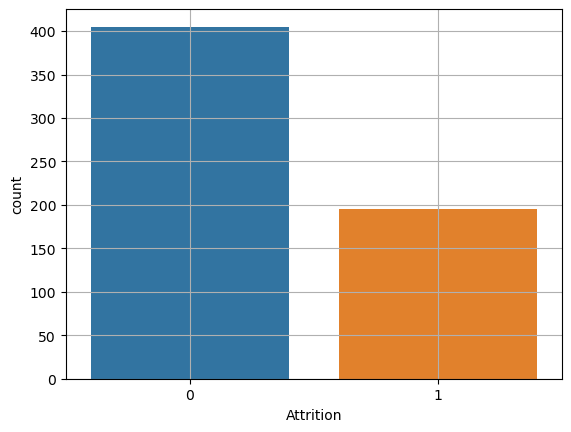

In [5]:
sns.countplot(x=target, data=data)
plt.grid()
plt.show()

- 왜 이렇게 이직률이 높을까?
- 데이터의 표집을 어떻게 했는지?
- 해당 데이터가 전체 데이터와 비슷한 양상 띨 만한지?
- 인사담당자님? 님이 생각하기에 이직 많이 하는 직원들은 어떤 특성 띠고 있는 것 같나요?
- -> 실무진과 인터뷰 해야 함

### feature

In [6]:
# 범주형 데이터이므로 빈도수 계산
var = 'OverTime'
data[var].value_counts()

OverTime
No     405
Yes    195
Name: count, dtype: int64

In [7]:
data[var].value_counts(normalize = True)

OverTime
No     0.675
Yes    0.325
Name: proportion, dtype: float64

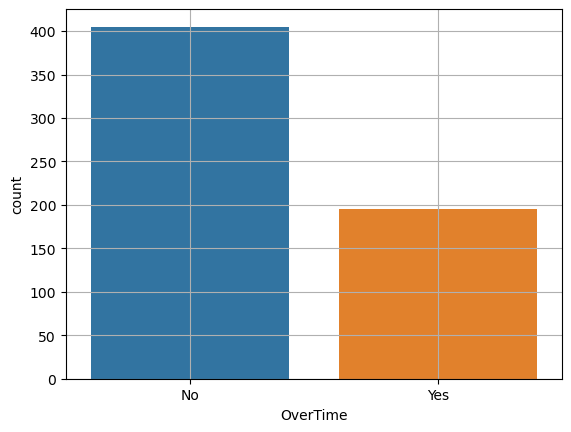

In [8]:
sns.countplot(x=var, data=data)
plt.grid()
plt.show()

- 야근 데이터는 어떻게 측정된 건지?
- 일주일에 며칠을 야근해야 야근 했다고 표시한 걸까?

In [11]:
# 수치형 데이터이므로 describe
var = 'PercentSalaryHike'
data[[var]].describe().T

,count,mean,std,min,25%,50%,75%,max
PercentSalaryHike,600.0,15.288333,3.667098,11.0,12.0,14.0,18.0,25.0


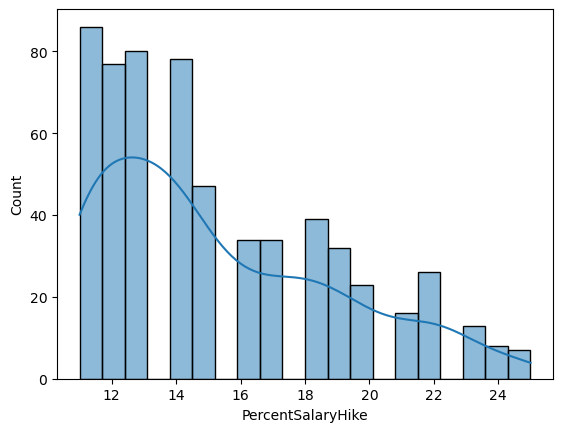

In [12]:
sns.histplot(x=var, data=data, bins=20, kde=True)
plt.show()

- 임금 인상률 높은 애들은 뭘까?

- cf. 일반 회사의 연봉 인상률은 3-5% (물가 인상률이 그러하므로..)

## **3. 범주-->범주**

In [13]:
target = 'Attrition'

### **(1) Gender --> Attrition**

In [15]:
feature = 'Gender'

* 교차표

In [16]:
# 두 범주별 빈도수를 교차표로 만들어 보자
pd.crosstab(data[target], data[feature])

Gender,Female,Male
Attrition,,
0,157,248
1,66,129


In [17]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

Gender,Female,Male
Attrition,,
0,0.704036,0.657825
1,0.295964,0.342175


- 전체 이직률 평균이 0.325였음을 기억하라
- 성별과 이직률은 약간 차이가 있을 거라 예상할 수 있음

* 시각화

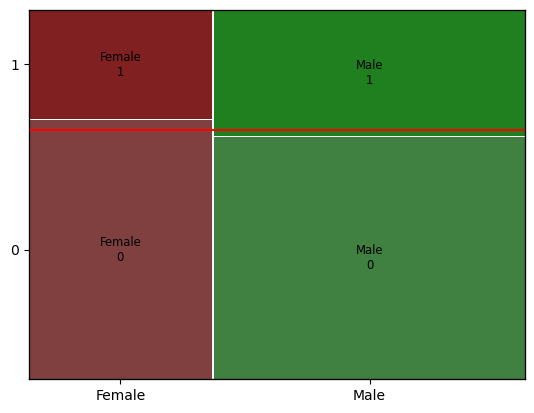

In [20]:
mosaic(data, [feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

애매... 카이제곱 검정해보자

* 수치화 : 카이제곱검정

In [36]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Gender     Female  Male
Attrition              
0             157   248
1              66   129
----------------------------------------------------------------------------------------------------
카이제곱통계량 1.1614318259891623
p-value 0.28116879016055174
자유도 1
기대빈도
 [[150.525 254.475]
 [ 72.475 122.525]]


* 파악된 내용을 기술해 봅시다.

- p-value가 0.05보다 크므로, 카이제곱검정으로는 관련이 없다고 나오나,
- 그래프로 볼때 약간 관련이 있다고 판단됨.

- 또한, 이직률이라는 건 그렇게 들쑥날쑥한 게 아니므로
- -> 관련있다고 볼 수도 있을 것 같음

### **(2) JobSatisfaction --> Attrition**

In [21]:
feature = 'JobSatisfaction'

* 교차표

In [22]:
pd.crosstab(data[target], data[feature])

JobSatisfaction,1,2,3,4
Attrition,,,,
0,74,79,114,138
1,52,37,59,47


In [24]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

JobSatisfaction,1,2,3,4
Attrition,,,,
0,0.587302,0.681034,0.65896,0.745946
1,0.412698,0.318966,0.34104,0.254054


- 만족도가 매우 낮은(1) 경우 꽤 많은 비율이 이직했음을 알 수 있음
- -> 뭐가 불만인지, 불만족인 사람들의 특징은 무엇인지 생각해봐야 함

* 시각화

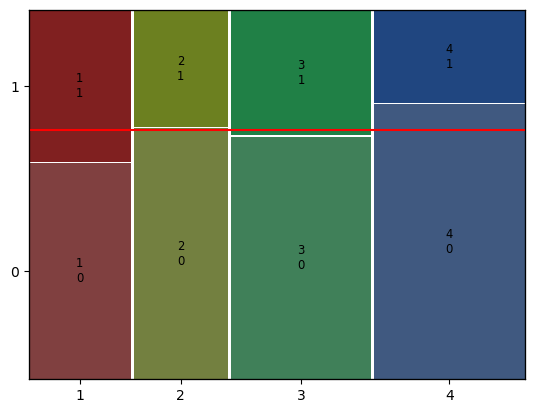

In [25]:
mosaic(data.sort_values(feature), [feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

- 만족도 매우 낮은 경우(1), 이직률 크고
- 만족도 매우 높은 경우(4), 이직률 낮음
- 만족도가 보통인 경우는 이직률 거의 차이 x -> 사람들이 이직하는 다른 이유가 있을까?
- -> 직무만족도와 이직률은 연관이 있음을 알 수 있음
- 만족 / 중간 / 불만 이런식으로 조사하면 좀더 명확한 결과 나오지 않을까? 아니면 5점대로?
- 역시 이직률이라는 도메인 특성상 엄청난 차이는 나오기 힘듦을 감안하면 직무만족도와 이직률은 꽤 상관이 있을을 알 수 있음

* 수치화 : 카이제곱검정

In [27]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 JobSatisfaction   1   2    3    4
Attrition                        
0                74  79  114  138
1                52  37   59   47
----------------------------------------------------------------------------------------------------
카이제곱통계량 8.884191097554549
p-value 0.03087092125625072
자유도 3
기대빈도
 [[ 85.05   78.3   116.775 124.875]
 [ 40.95   37.7    56.225  60.125]]


* 파악된 내용을 기술해 봅시다.

- 어느정도 상관관계가 있음을 알 수 있다

### **(3) MaritalStatus --> Attrition**

In [28]:
feature = 'MaritalStatus'

* 교차표

In [29]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,89,205,111
1,23,69,103


In [30]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,0.794643,0.748175,0.518692
1,0.205357,0.251825,0.481308


- 이혼·결혼한 사람들에 비해 싱글인 사람들이 더 이직을 많이하는듯

* 시각화

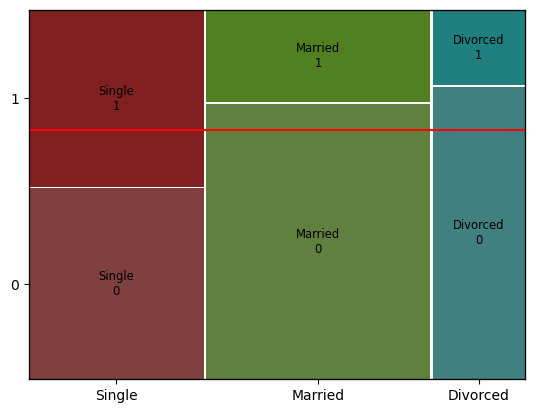

In [31]:
mosaic(data, [feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [32]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 MaritalStatus  Divorced  Married  Single
Attrition                               
0                    89      205     111
1                    23       69     103
----------------------------------------------------------------------------------------------------
카이제곱통계량 37.829711907070525
p-value 6.100738829354226e-09
자유도 2
기대빈도
 [[ 75.6  184.95 144.45]
 [ 36.4   89.05  69.55]]


* 파악된 내용을 기술해 봅시다.

- 결혼 여부와 이직률은 꽤 관련이 큼
- 싱글은 자유로우니까ㅏ... 나이도 더 적을 가능성이 큼
- 이혼하면 결혼 상태보다 더 안정을 원할듯 -> 더 이직 안 함
- 아니면 이혼비용, 양육비 등 때문일수도..

- 결혼 년수에 따라 분류할 수도 있음

++
- 싱글이라서 이직하는 게 아니라 싱글이라 야근을 더 많이하는 거 아닐까?? (x-x 분석해보자) ...

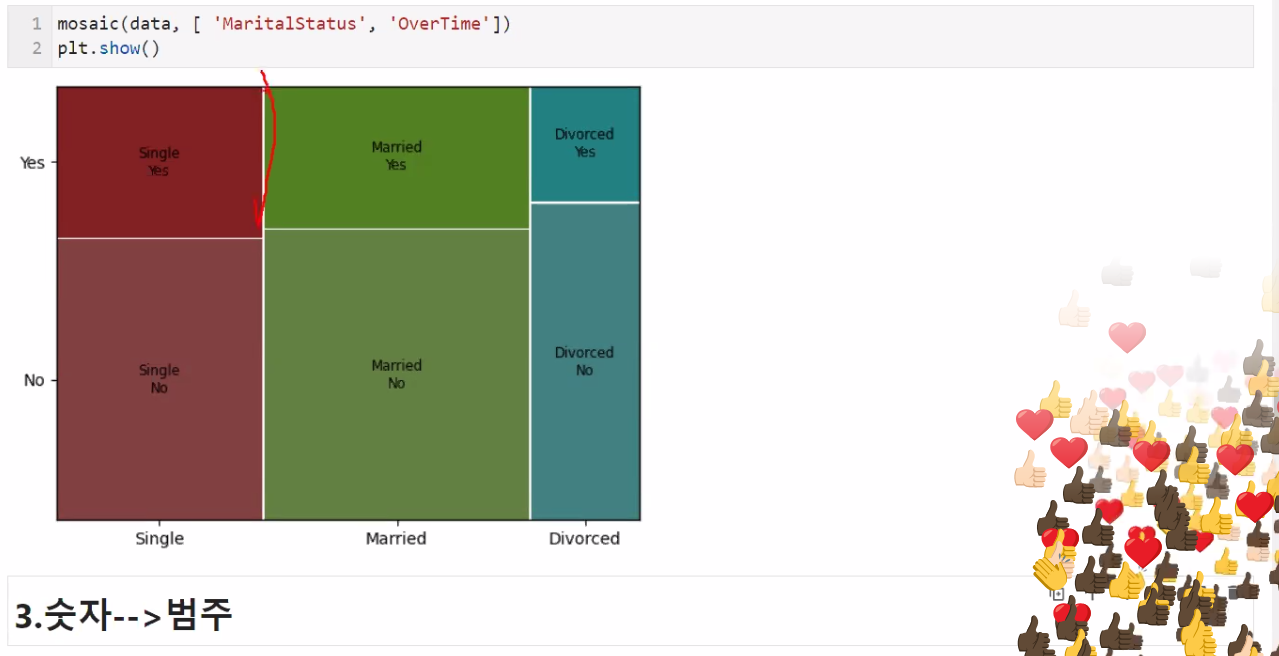
-> 결혼 여부와 야근 여부는 별 차이 없는 듯

### **(4) OverTime --> Attrition**

In [33]:
feature = 'OverTime'

* 교차표

In [34]:
pd.crosstab(data[target], data[feature])

OverTime,No,Yes
Attrition,,
0,315,90
1,90,105


In [35]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

OverTime,No,Yes
Attrition,,
0,0.777778,0.461538
1,0.222222,0.538462


야근한 경우 반은 이직함

* 시각화

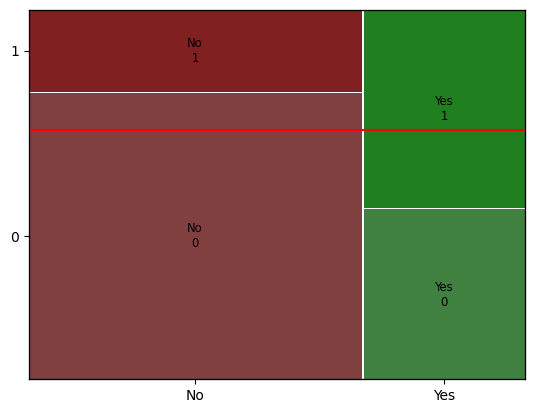

In [36]:
mosaic(data, [feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

야근여부와 이직여부 상관관계 큼

In [37]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 OverTime    No  Yes
Attrition          
0          315   90
1           90  105
----------------------------------------------------------------------------------------------------
카이제곱통계량 58.57149427899665
p-value 1.9603625783060702e-14
자유도 1
기대빈도
 [[273.375 131.625]
 [131.625  63.375]]


* 파악된 내용을 기술해 봅시다.

- 야근 여부>결혼 여부>직업 만족도>>성별

## **4. 숫자-->범주**

### **(1) Age --> Attrition**

In [38]:
feature = 'Age'

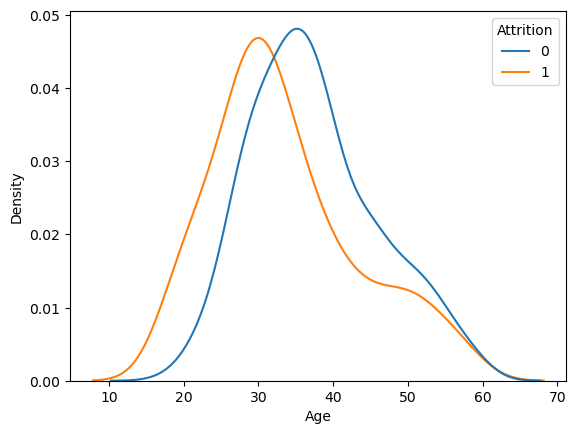

In [39]:
sns.kdeplot(x = feature, data = data, hue = target,
            common_norm = False) # 각각의 면적이 1이도록
plt.show()

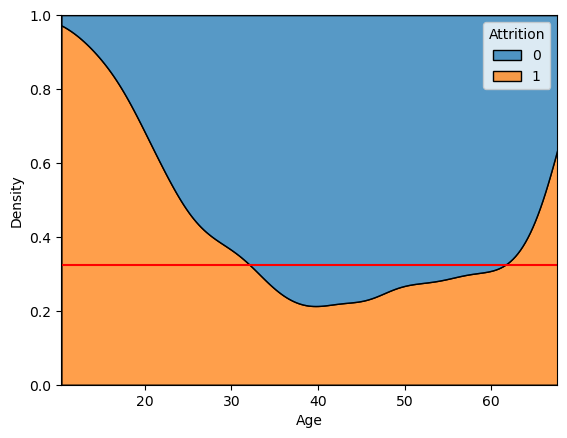

In [40]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

- 60세 이상은 없는데 걍 그림그리느라 저렇게 나타난 것 뿐
- 30대 초반은 이직률 높고 / 30대 후반 이상은 이직률 낮음

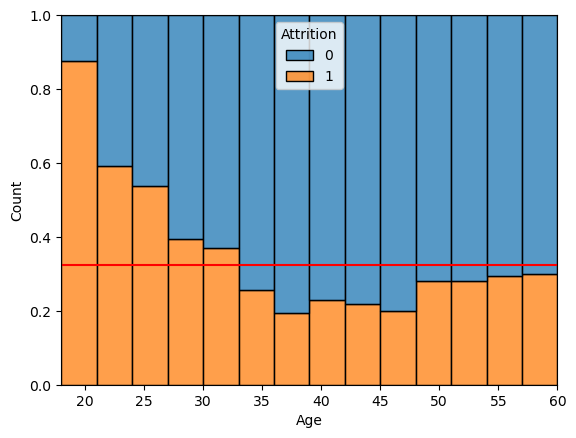

In [41]:
sns.histplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

- 33세쯤에서 평균과 만남
- 20대 근처는 왜이렇게 이직 많이 할까? 계약직인가? 알바인가?

### **(2) DistanceFromHome --> Attrition**

In [42]:
feature = 'DistanceFromHome'

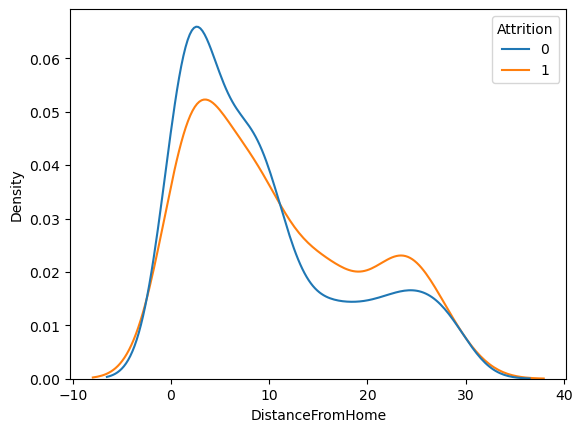

In [43]:
sns.kdeplot(x = feature, data = data, hue = target,
            common_norm = False) # 각각의 면적이 1이도록
plt.show()

10마일 초반대가 넘어가면 이직 많이 함

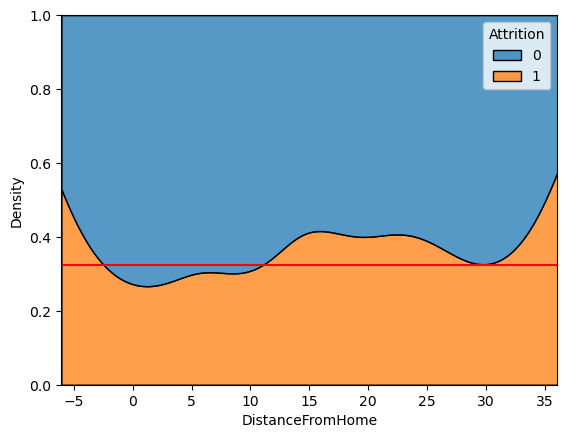

In [44]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

- 거리값은 0 이하일 수 없으나 밀도추정함수 그리다보니 위처럼 그려진 것
- -> 히스토그램 봐서 확인하셈

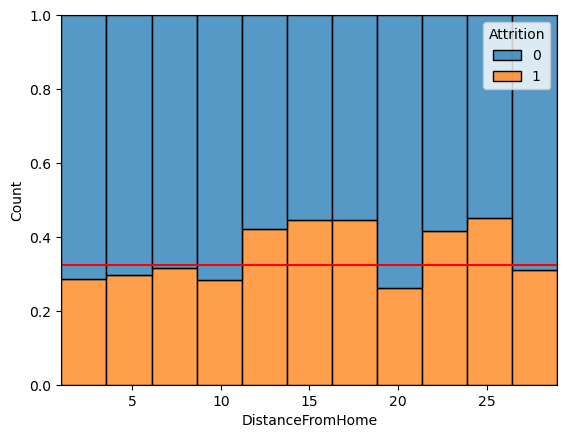

In [45]:
sns.histplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

- 20 마일 거리에 뭐가 있나? 출퇴근 버스? 기숙사?
- 가까우면 이직률이 낮다고 이해할 수 있음

### **(3) MonthlyIncome --> Attrition**

In [46]:
feature = 'MonthlyIncome'

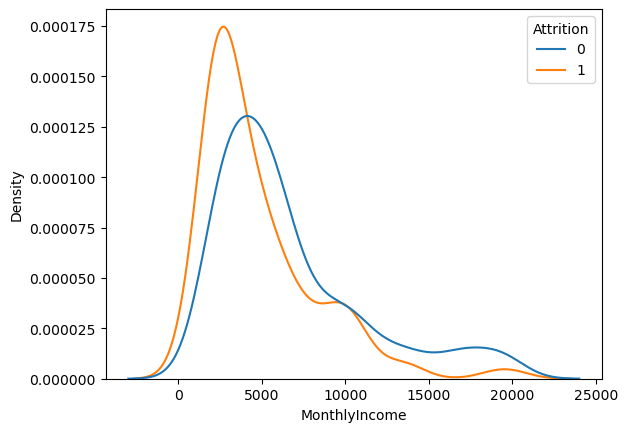

In [47]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False) # 각각의 면적이 1이도록
plt.show()

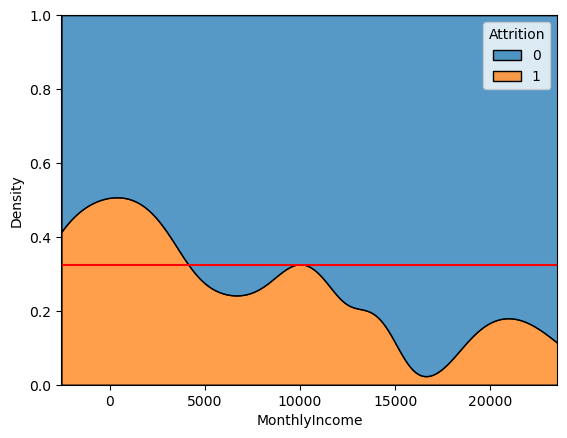

In [49]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

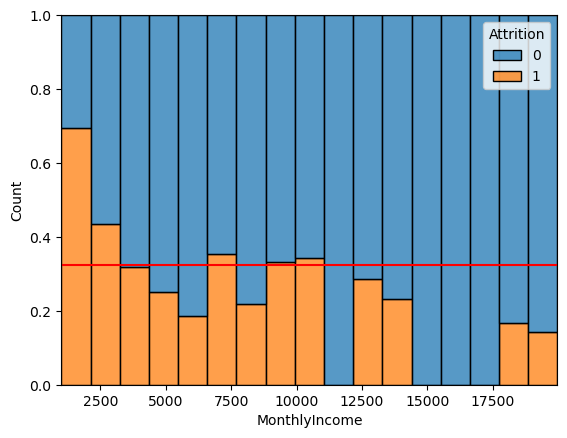

In [51]:
sns.histplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

- 월급 많이받을수록 이직 덜함
- 월급 약 4000달러 이하면 많이 이직 -> 월급을 올려줄 순 없나?
- 7000달러랑 10000달러 부근은 뭘까.. -> 돈은 많이 받지만 업무강도가 높나? 경력직으로 이직하나? 돈이 문제가 아닌듯 -> 야근여부랑 월급이랑 분석해보자

### **(4) PercentSalaryHike --> Attrition**

In [52]:
feature = 'PercentSalaryHike'

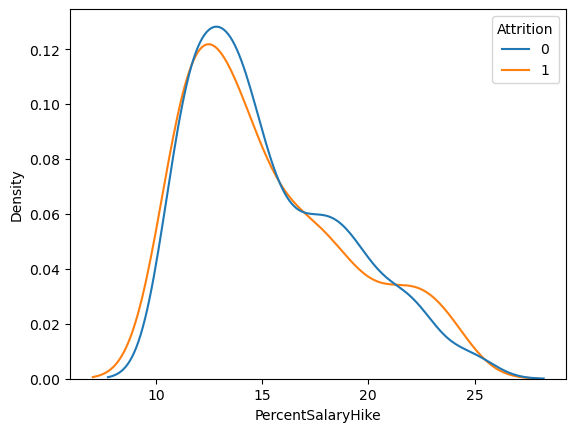

In [53]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False) # 각각의 면적이 1이도록
plt.show()

임금인상률과 이직률은 별 차이 x

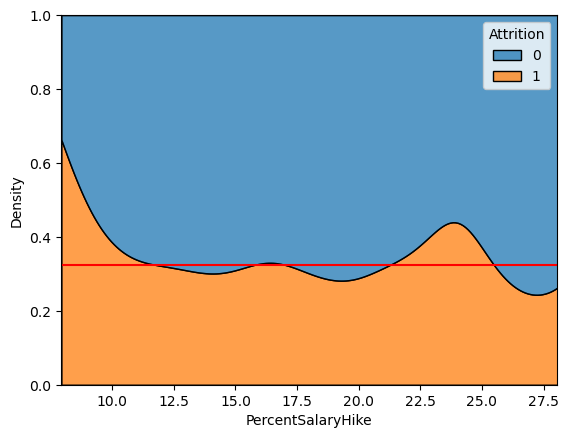

In [54]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

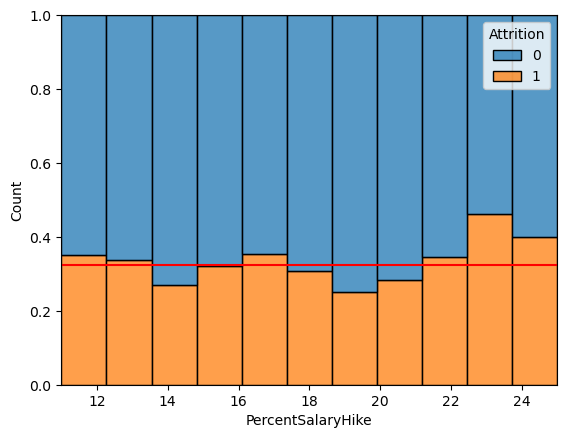

In [55]:
sns.histplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

- 임금인상률과 이직률은 별 차이 없는데, 임금인상률 높은 사람들은 뭘까... 엄청난 성과를 냈거나, 승진을 했거나, 평직원->경영진으로 점프했나? 인턴->정사원?
- 근데 임금인상률 높은데 이직하는 건 뭘까

### **(5) TotalWorkingYears --> Attrition**

In [56]:
feature = 'TotalWorkingYears'

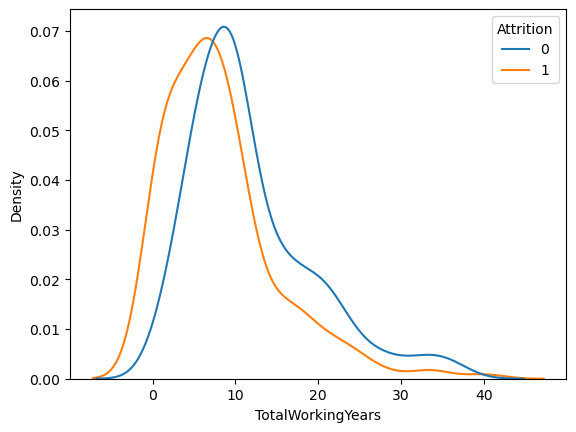

In [57]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False) # 각각의 면적이 1이도록
plt.show()

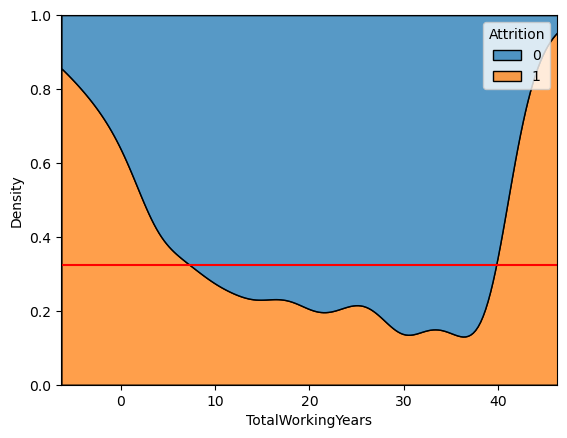

In [58]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

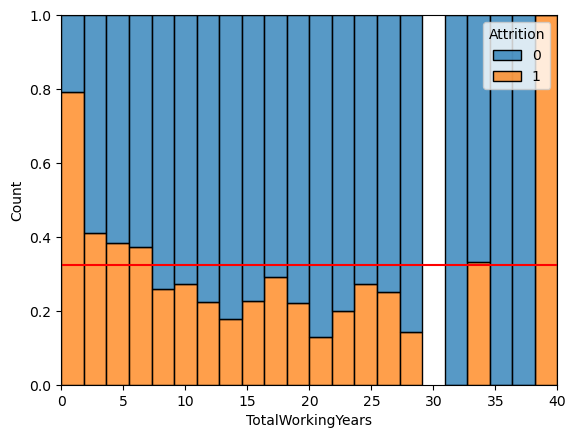

In [59]:
sns.histplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

- 나이와 비슷한 형태
- 경력 별로 없는 (7년 이하) 사람들은 이직 많이 함
- 35, 40년도는 은퇴하는 건듯?
- 17, 25년도?

## **5. 관계 정리하기**

① 강한관계

- 결혼 상태
- 야근 여부

② 중간관계

- 나이
- 집까지의 거리
- 월급

③ 관계없음(약한 관계)

- 성별
- 직업 만족도
- 임금인상률
- 총근무연수